# Angular Model Demo: 3 Dimensions (3 Qubits) $-$ RGB visualization


For this notebook there are some additional requirements (install via `pip`):
```
- Pillow >= 7.1.2
```
___

In [1]:
from qrobot.models import AngularModel

In this notebook we present a 3-dimensional ($n=3$) demo for the `AngularModel` class. For simplicity's sake, we consider $\tau = 1$

In [2]:
n = 3
tau = 1

`demo_RGB_utils.py` contains a `Plotter` class which implements useful methods to plot the data:

In [3]:
from demo_RGB_utils import Plotter
plotter = Plotter()

## Input definition

We start by defining an arbirary input:

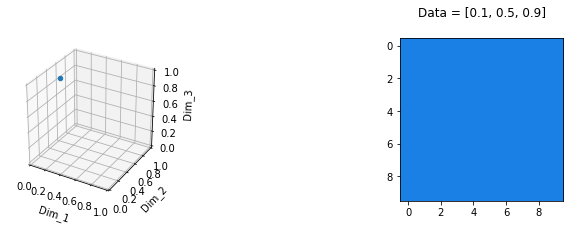

In [4]:
input_data = [.1,.5,.9]
plotter.plot_data(input_data)

## Encode the input in the model

We initialize the model by instantiating an object with $n$ and $\tau$

In [5]:
model = AngularModel(n,tau)

Using the `encode` method, we  encode the event's tridimensional data in the model. Since we have a multidimensional inputs, two  loops are needed -in general- in order to loop through the $n$ dimensions of the input and then through time. Despite this, we considered $\tau = 1$, hence only one loop is needed:

In [6]:

model.clear() # to re-initialize the model (allows re-runing this cell without double the encoding)

for i in range(0,model.n):
    model.encode(input_data[i],dim=i+1)

The model is implemented by a Qiskit quantum circuit:

In [7]:
model.print_circuit()

     ┌───────────┐ 
q_0: ┤ RY(pi/10) ├─
     └┬──────────┤ 
q_1: ─┤ RY(pi/2) ├─
     ┌┴──────────┴┐
q_2: ┤ RY(2.8274) ├
     └────────────┘
c_0: ══════════════
                   
c_1: ══════════════
                   
c_2: ══════════════
                   


Given the input we defined above, the model is in the following state:

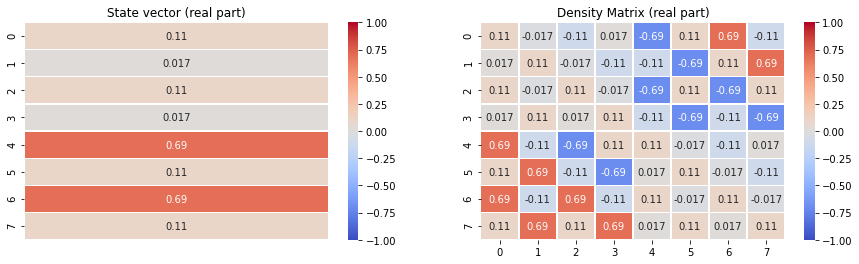

In [8]:
model.plot_state_mat()

## Measurement simulation

We simulate `shots` measurements, and then we extract the relative frequencies for the $2^n$ possible basis state outcomes:

In [9]:
shots = 1000000
counts = model.measure(shots)

Raw counts for each possible outcome:

In [10]:
import json
print("Aggregated binary outcomes of the circuit:")
print(json.dumps(counts, sort_keys=True, indent=4))

Aggregated binary outcomes of the circuit:
{
    "000": 12119,
    "001": 293,
    "010": 11939,
    "011": 298,
    "100": 476159,
    "101": 11792,
    "110": 475420,
    "111": 11980
}


From the raw counts we can obtain the relative frequencies (aka the probabilities) and compare them with the input sequence. Since we have not operated any change of basis (with the `model.query(target)` method), the canonical basis is maintained, and it is possible to visualize it still with our RGB representation:

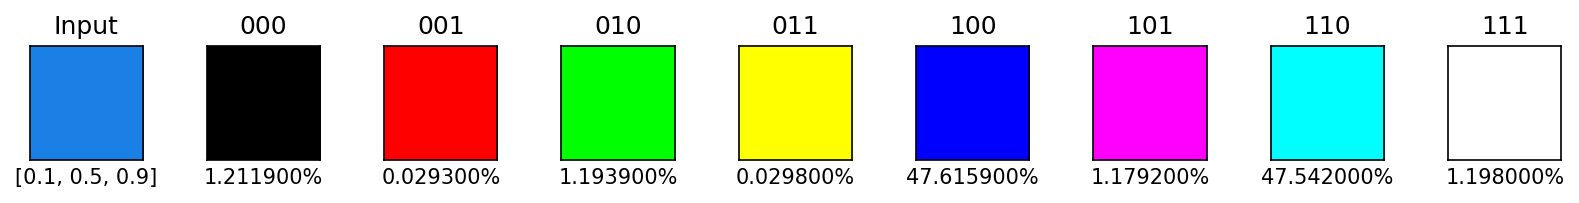

In [11]:
plotter.plot_result(input_data, counts, shots)